<div style="text-align: center;">
  <font size="5">線形代数の使いどころ</font>
</div>
<div style="text-align: right;">
  <font size="3">cc by Shigeto R. Nishitani</font>
</div>



# Table of Contents
 <p><div class="lev1 toc-item"><a href="#線形代数" data-toc-modified-id="線形代数-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>線形代数</a></div><div class="lev1 toc-item"><a href="#エラー訂正符号" data-toc-modified-id="エラー訂正符号-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>エラー訂正符号</a></div><div class="lev2 toc-item"><a href="#チェック行列" data-toc-modified-id="チェック行列-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>チェック行列</a></div><div class="lev2 toc-item"><a href="#エラー検出の原理" data-toc-modified-id="エラー検出の原理-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>エラー検出の原理</a></div><div class="lev2 toc-item"><a href="#Hammingの生成行列(generator-matrix)" data-toc-modified-id="Hammingの生成行列(generator-matrix)-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Hammingの生成行列(generator matrix)</a></div><div class="lev2 toc-item"><a href="#GF(2)" data-toc-modified-id="GF(2)-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>GF(2)</a></div><div class="lev1 toc-item"><a href="#Deep-Learning" data-toc-modified-id="Deep-Learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Deep Learning</a></div><div class="lev2 toc-item"><a href="#手書き数字認識(MNIST)" data-toc-modified-id="手書き数字認識(MNIST)-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>手書き数字認識(MNIST)</a></div><div class="lev2 toc-item"><a href="#load_mnist" data-toc-modified-id="load_mnist-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>load_mnist</a></div><div class="lev2 toc-item"><a href="#neuralnet_mnist" data-toc-modified-id="neuralnet_mnist-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>neuralnet_mnist</a></div>

<div style="text-align: center;">
  <font size="5">線形代数の使いどころ</font>
</div>
<div style="text-align: right;">
  <font size="3">cc by Shigeto R. Nishitani</font>
</div>



# 線形代数

この頃大学でしかやらない数学の領域の代表例が線形代数です．情報科学の多くの領域で，線形代数はその基本となる概念を提供してくれます．線形代数の概念が身につくと問題の見通しがよくなるんです．

講義の内容としては，
* 応用
* 計算アルゴリズム
* 概念

というのが必要なのですが，ここでは，「応用例」と「
概念を視覚化」する様子を紹介します．

はじめに，エラー訂正符号の計算をして見ましょう．

# エラー訂正符号
## チェック行列

次の計算をしてみてください．
$$
\begin{align}
H & = 
\left(\begin{matrix}0 & 0 & 0 & 1 & 1 & 1 & 1\\0 & 1 & 1 & 0 & 0 & 1 & 1\\1 & 0 & 1 & 0 & 1 & 0 & 1\end{matrix}\right)
\\
v_1 & = \left( \begin{matrix}0\\0\\1\\0\\0\\0\\0\end{matrix}\right)
\\
H.v_1 = ?
\end{align}
$$


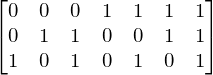

In [1]:
from sympy import *
init_printing()

H=Matrix([[0,0,0,1,1,1,1],[0,1,1,0,0,1,1],[1,0,1,0,1,0,1]])
H

In [2]:
v_e=Matrix([0,0,1,0,0,0,0])
v_e

In [3]:
H.dot(v_e)

## エラー検出の原理

これはハミングが見つけた，エラーを見つけるチェック行列と呼ばれています．

例えばAからBへコードワード$v_{code}$を送った時に，仮に一箇所エラー$v_{error}$が入ったとします．Bが受け取る信号$v_{signal}$は
$
v_{signal} = v_{code} + v_{error}
$
となるわけですが，これを$H$に通すと自動的にその場所を特定してくれるわけです．

その条件は
> もし，$H.v_{code}=0$ならば

です．


## Hammingの生成行列(generator matrix)
$H.v_{code}=0$となる$v_{code}$(コードワードと呼ばれます)を生成するHammingの生成行列(generator matrix)は
$$
G= \left(\begin{matrix}1 & 0 & 1 & 1\\1 & 1 & 0 & 1\\0 & 0 & 0 & 1\\1 & 1 & 1 & 0\\0 & 0 & 1 & 0\\0 & 1 & 0 & 0\\1 & 0 & 0 & 0\end{matrix}\right)
$$

です．例えば，送りたい信号
$v_{orig}=[1,0,0,1]$だとすると，
これを$G$に通して出てきたコードワード$v_{code}$を
さらに$H$に通すと零ベクトルとなります．

このようにある行列に作用させた時に零ベクトルとなる
ベクトルの作る空間をヌルスペース(null space)と呼びます．

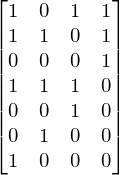

In [4]:
G=Matrix([[1,0,1,1],
[1,1,0,1],
[0,0,0,1],
[1,1,1,0],
[0,0,1,0],
[0,1,0,0],
[1,0,0,0]])
G

In [5]:
v_1 = Matrix([1,0,0,1])
v_1

In [6]:
G.dot(v_1)

In [7]:
Matrix([2,2,1,1,0,0,1])

In [8]:
H.dot(Matrix([0,0,1,1,0,0,1]))

## GF(2)
おっと，一つ計算上のルールを忘れていました．
ここの計算では$GF(2)$上の算術とします．
$GF(2)$での算術をまとめると

|$\times$|0|1|
|:----:|:---:|:---:|
|0| 0| 0|
|1| 0| 1|

|$+$|0|1|
|:----:|:---:|:---:|
|0| 0| 1|
|1| 1| 0|

となります．要素は0と1だけの体です．
GF(2)は2元ガロア体(Galois Field 2)の略で，
20歳で早世した抽象代数の基礎を築いたGaloisにちなんでいます．

なので，上の行列計算で1以上が出た時には，2で割ってそのあまりを考えることになります．

# Deep Learning
深層学習という手法によって
「AIが目を手に入れた」
と評されています．

画像認識のトライアルとしてよく例示される手書き数字認識で，deep learningで何をしているかを実感してもらおうと思います．ここでの記述と関数は「ゼロから作るDeep Learning――Pythonで学ぶディープラーニングの理論と実装」斎藤 康毅　著，(Oreilly Japan 2016)によります．

## 手書き数字認識(MNIST)

[mnist](http://yann.lecun.com/exdb/mnist/)によると，nistが提供していたhand writingのDBとしてspecial database 3とspecial database 1というのがあって，SD-3はCensus Bureauの雇用者からSD-1はJunior high schoolの学生からあつめたもので，そこには認識率におおきな差があったのだって．それらを混ぜ合わせた，training setとtest setとして新たに提供されたのが，mixing NIST's datasetsからこの呼び名がついたって．

## load_mnist

In [9]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)

(60000, 784)


本に書いてあるcodeではjupyterで表示しなかったので，
http://biopython.seesaa.net/article/451770389.html
に従って修正．

5


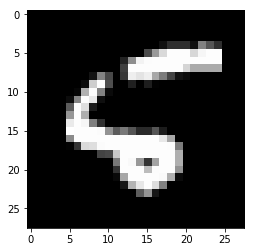

In [11]:
# coding: utf-8
%matplotlib inline

import sys, os
sys.path.append(os.pardir) 
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
import matplotlib.pyplot as plt

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    plt.imshow(np.array(pil_img))

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

for i in [8]:
    img = x_test[i]
    label = t_test[i]
    print(label)
    img = img.reshape(28, 28)
    plt.imshow(img, cmap='gray')

## neuralnet_mnist

sample_weight.pklをch03からcpしておく必要あり．



In [12]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))



Accuracy:0.9352


何をするかをみるため，最後尾の駆動部を変更している．
最初の10データに対して，それぞれ数字の確率と，実際の数字を表示している．

例えば，一つ目のデータでは，7の確率が0.9971で，実際の字も7である．

predictがやっていることを見ればいいが，単に行列の積を計算しているだけ．それで予測ができるとさ．だから，中間層を表す行列の要素さえただしく決定できればそれでニューラルネットは終わり！！

In [13]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(10):
    y = predict(network, x[i])
    print("No:{}, Ans:{}".format(i,t[i]))
    print("Guess",['{:.2f}'.format(n) for n in y])


No:0, Ans:7
Guess ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00']
No:1, Ans:2
Guess ['0.00', '0.00', '0.94', '0.01', '0.00', '0.01', '0.03', '0.00', '0.00', '0.00']
No:2, Ans:1
Guess ['0.00', '0.99', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']
No:3, Ans:0
Guess ['0.99', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']
No:4, Ans:4
Guess ['0.00', '0.00', '0.00', '0.00', '0.95', '0.00', '0.00', '0.01', '0.00', '0.03']
No:5, Ans:1
Guess ['0.00', '0.99', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']
No:6, Ans:4
Guess ['0.00', '0.00', '0.00', '0.00', '0.97', '0.01', '0.00', '0.00', '0.01', '0.01']
No:7, Ans:9
Guess ['0.00', '0.00', '0.00', '0.01', '0.02', '0.00', '0.00', '0.01', '0.01', '0.95']
No:8, Ans:5
Guess ['0.00', '0.00', '0.01', '0.00', '0.03', '0.01', '0.95', '0.00', '0.00', '0.00']
No:9, Ans:9
Guess ['0.00', '0.00', '0.00', '0.00', '0.04', '0.00', '0.00', '0.04', '0.00', '0.92']
